# This is a simple example for using mermaid

In [ ]:
# First do all the necessary imports
%matplotlib inline

# If a higher resolution output is desired
#import matplotlib as mpl
#mpl.rc("savefig", dpi=150)

import set_pyreg_paths

import numpy as np
import matplotlib.pyplot as plt

import pyreg.simple_interface as SI
import pyreg.example_generation as EG
import pyreg.module_parameters as pars
import pyreg.utils as utils
import pyreg.visualize_registration_results as vizreg
import torch
from torch.autograd import Variable

# keep track of general parameters
params = pars.ParameterDict()

In [10]:
# Get an example image pair
I0,I1,spacing = EG.CreateRealExampleImages(dim=2).create_image_pair()

Image does not seem to have spacing information.
Guessed dimension to be dim = 3
Using guessed spacing of [ 1.  1.  1.]
INFO: Normalizing the spacing to [0,1] in the largest dimension. (Turn normalize_spacing off if this is not desired.)
Normalize spacing: [ 1.  1.  1.] -> [ 0.00787402  0.00787402  0.00787402]
Normalize spacing, extent: [ 127.  127.    0.] -> [ 1.  1.  0.]
Normalize spacing: [ 0.00787402  0.00787402] -> [ 0.00787402  0.00787402]
Normalize spacing, extent: [ 1.  1.] -> [ 1.  1.]
Image does not seem to have spacing information.
Guessed dimension to be dim = 3
Using guessed spacing of [ 1.  1.  1.]
INFO: Normalizing the spacing to [0,1] in the largest dimension. (Turn normalize_spacing off if this is not desired.)
Normalize spacing: [ 1.  1.  1.] -> [ 0.00787402  0.00787402  0.00787402]
Normalize spacing, extent: [ 127.  127.    0.] -> [ 1.  1.  0.]
Normalize spacing: [ 0.00787402  0.00787402] -> [ 0.00787402  0.00787402]
Normalize spacing, extent: [ 1.  1.] -> [ 1.  1.]


In [11]:
# print possible model names
SI.RegisterImagePair().print_available_models()


Known registration models are:
------------------------------
                     total_variation_map: displacement-based total variation registration
                 svf_vector_momentum_map: map-based stationary velocity field using the vector momentum
               svf_vector_momentum_image: image-based stationary velocity field using the vector momentum
                              affine_map: map-based affine registration
                 svf_scalar_momentum_map: map-based stationary velocity field using the scalar momentum
                           curvature_map: displacement-based curvature registration
                    lddmm_shooting_image: image-based shooting-based LDDMM using the vector momentum
                           diffusion_map: displacement-based diffusion registration
                               svf_image: image-based stationary velocity field
                                 svf_map: map-based stationary velocity field
               svf_scalar_momentum

Creating new category: root.model
Creating new category: root.model.deformation
Creating key = use_map; category = root.model.deformation; value = True
Creating new category: root.model.registration_model
Creating key = type; category = root.model.registration_model; value = lddmm_shooting_scalar_momentum_map
Creating new category: root.optimizer
Creating new category: root.optimizer.single_scale
Creating key = nr_of_iterations; category = root.optimizer.single_scale; value = 20
Creating new category: root.model.registration_model.similarity_measure
Creating key = sigma; category = root.model.registration_model.similarity_measure; value = 0.01
Creating key = map_low_res_factor; category = root.model.deformation; value = 0.25
Creating key = iter; category = root; value = 0
Overwriting key = use_map; category = root.model.deformation; value =  True -> True
Overwriting key = map_low_res_factor; category = root.model.deformation; value =  0.25 -> 0.25
Using default value = 0.0001 for key =

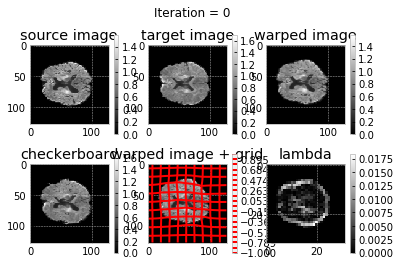

Iter 1: E=[ 151.45181274], similarityE=[ 151.45162964], regE=[ 0.00017677], relF=[ 0.70403683] 
Found UNACCEPTABLE step: new alpha_k = 0.5
Iter 2: E=[ 139.43882751], similarityE=[ 139.43869019], regE=[ 0.00014017], relF=[ 0.08553892] 
Iter 3: E=[ 134.35136414], similarityE=[ 134.35118103], regE=[ 0.00017718], relF=[ 0.03758709] 
Iter 4: E=[ 132.22187805], similarityE=[ 132.22171021], regE=[ 0.00017485], relF=[ 0.01598451] 
Iter 5: E=[ 127.49239349], similarityE=[ 127.49221039], regE=[ 0.0001795], relF=[ 0.0368075] 


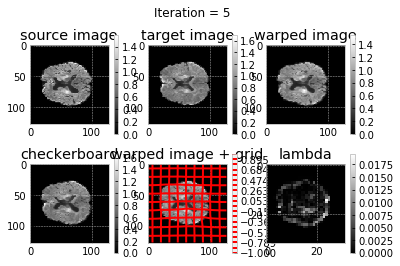

Iter 6: E=[ 123.33297729], similarityE=[ 123.33277893], regE=[ 0.00019949], relF=[ 0.03345384] 
Iter 7: E=[ 119.17049408], similarityE=[ 119.1702652], regE=[ 0.00022565], relF=[ 0.03463815] 
Iter 8: E=[ 114.45097351], similarityE=[ 114.45069885], regE=[ 0.00027479], relF=[ 0.040879] 
Iter 9: E=[ 110.8944931], similarityE=[ 110.89414215], regE=[ 0.00034811], relF=[ 0.03178423] 
Iter 10: E=[ 106.88850403], similarityE=[ 106.88808441], regE=[ 0.00041978], relF=[ 0.03713083] 


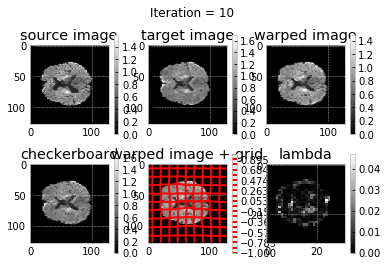

Iter 11: E=[ 103.40853119], similarityE=[ 103.40809631], regE=[ 0.00043662], relF=[ 0.03333035] 
Iter 12: E=[ 100.94672394], similarityE=[ 100.94629669], regE=[ 0.00042397], relF=[ 0.02414798] 
Iter 13: E=[ 99.44599152], similarityE=[ 99.44557953], regE=[ 0.00041565], relF=[ 0.01494069] 
Iter 14: E=[ 97.93778229], similarityE=[ 97.93738556], regE=[ 0.00039468], relF=[ 0.01524402] 
Iter 15: E=[ 96.76554108], similarityE=[ 96.76506042], regE=[ 0.00047704], relF=[ 0.01199033] 


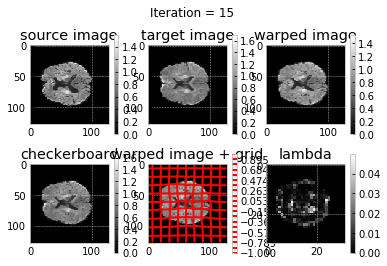

Iter 16: E=[ 94.94987488], similarityE=[ 94.94939423], regE=[ 0.00047793], relF=[ 0.01892307] 
Iter 17: E=[ 93.78430939], similarityE=[ 93.78382874], regE=[ 0.00048292], relF=[ 0.01229703] 
Iter 18: E=[ 92.78420258], similarityE=[ 92.78369904], regE=[ 0.00050446], relF=[ 0.01066392] 
Iter 19: E=[ 90.96286011], similarityE=[ 90.96229553], regE=[ 0.00056188], relF=[ 0.0198052] 
('time:', 40.638920068740845)


In [12]:
reg = SI.RegisterImagePair()
reg.register_images(I0, I1, spacing, model_name='lddmm_shooting_scalar_momentum_map',
                                      nr_of_iterations=20,visualize_step=5,map_low_res_factor=0.25,
                                      similarity_measure_sigma=0.01)

In [14]:
reg.get_energy()

(array([ 90.96286011], dtype=float32),
 array([ 90.96229553], dtype=float32),
 array([ 0.00056188], dtype=float32))

In [15]:
phi = reg.get_map()

In [16]:
I0_warped = utils.compute_warped_image_multiNC(Variable(torch.from_numpy(I0)), phi, spacing)

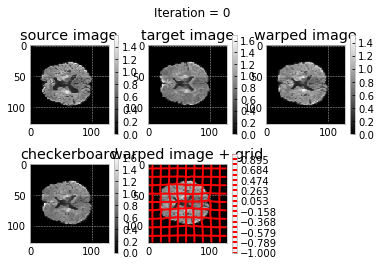

In [17]:
vizreg.show_current_images(0, Variable(torch.from_numpy(I0)),
                           Variable(torch.from_numpy(I1)),
                           I0_warped, phiWarped=phi)